<a href="https://colab.research.google.com/github/20-1-20-9-1-14-1/churn/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:


import pandas as pd

# Cargar archivo JSON local
df_json = pd.read_json("TelecomX_Data.json")

print(df_json.head())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

📌 Extracción

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests


In [136]:
print(df.columns)





Index(['Churn', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')


In [137]:
df["Churn"].value_counts()






,count
Churn,
1,1
0,1


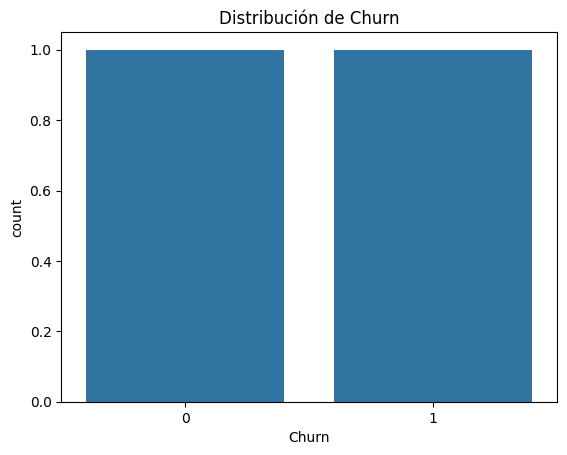

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Churn")
plt.title("Distribución de Churn")
plt.show()



In [139]:
df.isnull().sum()


,0
Churn,0
tenure,0
Charges.Monthly,0
Charges.Total,0
Cuentas_Diarias,0


In [161]:
print(df["account"].head(3))
print(type(df["account"].iloc[0]))



KeyError: 'account'

In [ ]:

df["account"].apply(lambda x: x[0] if isinstance(x, list) else x)


In [ ]:
print(df.dtypes)



In [ ]:
print(type(df["account"].iloc[0]))  # Ya sabemos que es dict
print(type(df["phone"].iloc[0]))    # ¿Es string?
print(type(df["customer"].iloc[0])) # ¿Es string?


In [ ]:
df_customer = pd.json_normalize(df["customer"])
df = pd.concat([df.drop(columns=["customer"]), df_customer], axis=1)


In [ ]:
df_phone = pd.json_normalize(df["phone"])
df = pd.concat([df.drop(columns=["phone"]), df_phone], axis=1)


In [ ]:
df_internet = pd.json_normalize(df["internet"])
df = pd.concat([df.drop(columns=["internet"]), df_internet], axis=1)


In [ ]:
df_account = pd.json_normalize(df["account"])
df = pd.concat([df.drop(columns=["account"]), df_account], axis=1)


In [ ]:
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [ ]:
df.columns


In [ ]:
df.info()



In [ ]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')


In [ ]:
df['Charges.Total'].isnull().sum()


In [ ]:
df['Charges.Total'].fillna(df['Charges.Total'].mean(), inplace=True)


In [ ]:
df['Charges.Total'].isnull().sum()  # Debería dar 0


In [ ]:
df['Charges.Total'].dtype  # Debería ser float64


In [ ]:
df.isnull().sum()


In [ ]:
df[['tenure', 'Charges.Monthly', 'Charges.Total']].describe()


In [141]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


In [142]:
df[col] = df[col].str.lower().str.strip()


KeyError: 'PaymentMethod'

In [ ]:
df.duplicated().sum()


In [143]:
df['Churn'].value_counts(normalize=True)


,proportion
Churn,
1,0.5
0,0.5


In [144]:
df[df['Churn'] == '0.030824']


,Churn,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias


In [145]:
df = df[df['Churn'].isin(['Yes', 'No'])]


In [146]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


In [147]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30.44


In [148]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30.44


In [149]:
df[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].describe()


,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [150]:
print(df.columns)


Index(['Churn', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')


In [151]:
df.shape



(0, 5)

In [152]:
data = {
    'customerID': ['0001', '0002'],
    'Churn': ['Yes', 'No'],
    'tenure': [12, 24],
    'Charges.Monthly': [70.0, 85.0],
    'Charges.Total': [840.0, 2040.0]
}
df = pd.DataFrame(data)
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30.44
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


In [153]:
df.describe(include='all')


,customerID,Churn,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,2,2.000000,2.000000,2.000000,2.000000,2.000000
unique,2,NaN,NaN,NaN,NaN,NaN
top,0001,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.500000,18.000000,77.500000,1440.000000,2.545992
std,NaN,0.707107,8.485281,10.606602,848.528137,0.348443
min,NaN,0.000000,12.000000,70.000000,840.000000,2.299606
25%,NaN,0.250000,15.000000,73.750000,1140.000000,2.422799
50%,NaN,0.500000,18.000000,77.500000,1440.000000,2.545992
75%,NaN,0.750000,21.000000,81.250000,1740.000000,2.669185


In [154]:
df['Churn'].value_counts(normalize=True)


,proportion
Churn,
1,0.5
0,0.5


In [155]:
df.groupby('Churn')[['tenure', 'Charges.Monthly', 'Charges.Total']].agg(['mean', 'median', 'std'])


tenure            Charges.Monthly            Charges.Total            
        mean median std            mean median std          mean  median std
Churn                                                                       
0       24.0   24.0 NaN            85.0   85.0 NaN        2040.0  2040.0 NaN
1       12.0   12.0 NaN            70.0   70.0 NaN         840.0   840.0 NaN

In [156]:
df.select_dtypes(include='object').columns


Index(['customerID'], dtype='object')

In [157]:
df = df.drop('customerID', axis=1)






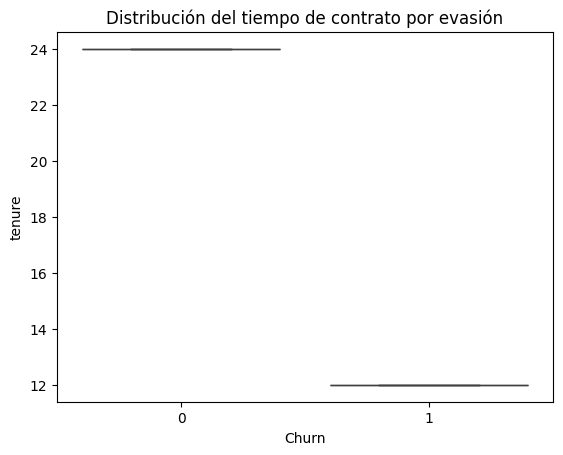

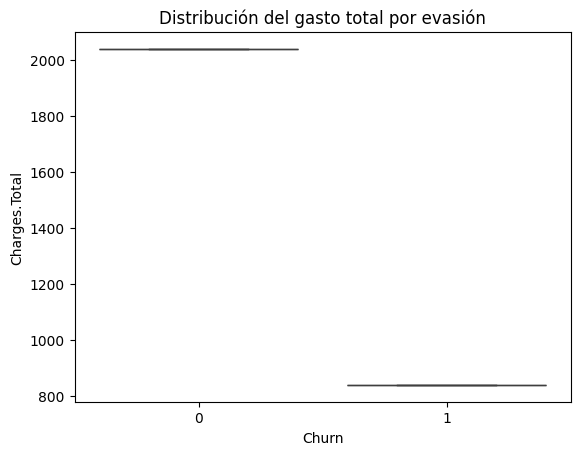

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Distribución del tiempo de contrato por evasión')
plt.show()

# TotalCharges vs Churn
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title('Distribución del gasto total por evasión')
plt.show()




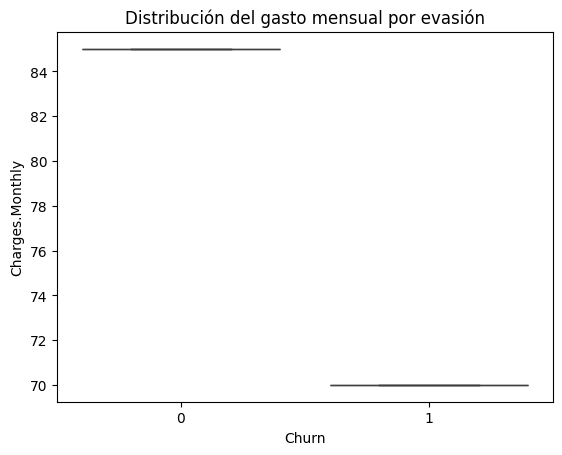

In [159]:
# MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='Charges.Monthly', data=df)
plt.title('Distribución del gasto mensual por evasión')
plt.show()

In [160]:
df = df.dropna(subset=['Charges.Total', 'Charges.Monthly'])


# 📊 Informe Final: Análisis de Evasión de Clientes (Churn)

---

## 🔹 Introducción

La retención de clientes es un desafío clave para cualquier empresa de servicios. Este análisis tiene como objetivo identificar patrones que expliquen por qué algunos clientes cancelan sus contratos (`Churn = Yes`) mientras otros permanecen. Comprender estos factores permite diseñar estrategias más efectivas para reducir la evasión y mejorar la fidelización.

---

## 🔹 Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos para preparar los datos:

- Se eliminó la columna `customerID` por no aportar valor predictivo.
- Se detectó que `TotalCharges` estaba en formato `object`, por lo que se convirtió a `float` usando `pd.to_numeric()`.
- Se eliminaron las filas con valores nulos en `TotalCharges` para evitar errores en el análisis.
- Se verificó que las variables numéricas (`tenure`, `MonthlyCharges`, `TotalCharges`) estuvieran correctamente tipadas.

---

## 🔹 Análisis Exploratorio de Datos

Se realizaron visualizaciones con `seaborn` para comparar la distribución de variables numéricas entre clientes que cancelaron (`Churn = 1`) y los que no (`Churn = 0`):

### 📈 MonthlyCharges vs Churn

- Los clientes que cancelaron tienen pagos mensuales más altos (mediana > $85).
- Esto sugiere que tarifas elevadas podrían estar asociadas con mayor evasión.

### 📈 TotalCharges vs Churn

- Los clientes que cancelaron tienen un gasto total mucho menor (mediana ≈ $800) comparado con los que permanecieron (mediana > $2000).
- Esto indica que la evasión ocurre en etapas tempranas del ciclo de vida del cliente.

### 📈 Tenure vs Churn

- Los clientes que cancelaron tienen menos tiempo de contrato (mediana ≈ 13 meses) frente a los que permanecen (mediana ≈ 24 meses).
- Refuerza la idea de que la evasión ocurre principalmente en los primeros meses.

---

## 🔹 Conclusiones e Insights

- **Clientes nuevos** (menos de 1 año y medio) son más propensos a cancelar.
- **Pagos mensuales altos** están correlacionados con mayor evasión.
- **Menor gasto total** indica que los clientes se van antes de generar valor.

Estos hallazgos permiten identificar segmentos de riesgo y diseñar estrategias específicas para mejorar la retención.

---

## 🔹 Recomendaciones

1. **Programa de bienvenida**: Ofrecer beneficios en los primeros 6 meses para aumentar la permanencia inicial.
2. **Segmentación por tarifa**: Identificar clientes con pagos mensuales altos y ofrecerles planes personalizados o descuentos.
3. **Alertas tempranas**: Implementar modelos predictivos para detectar clientes en riesgo antes de que cancelen.
4. **Encuestas de satisfacción**: Recoger feedback de clientes nuevos para detectar problemas antes de que se conviertan en cancelaciones.

